<a href="https://colab.research.google.com/github/MichaelMphuthi/Rock-Paper-Scissors-game/blob/main/Predictive_health_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preview of dataset:
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


/tmp/ipython-input-9-2589186402.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
/tmp/ipython-input-9-2589186402.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the m

9/9 - 0s - 6ms/step - loss: 2660.2893 - mae: 2660.2893

📉 Mean Absolute Error on test data: $2660.29
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/tmp/ipython-input-9-2589186402.py:73: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


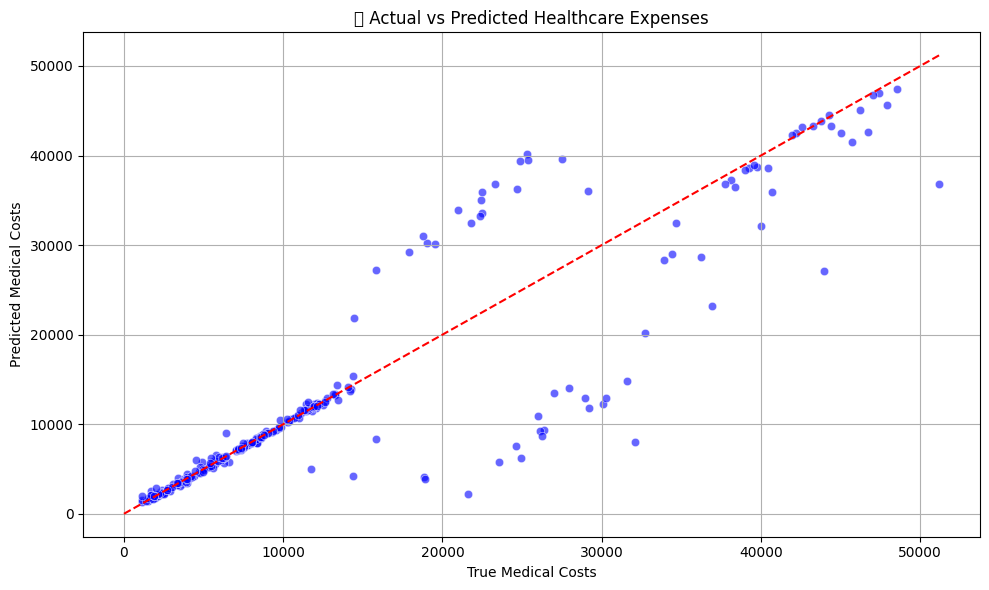

In [9]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 2: Download and load dataset
!wget -q https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

data = pd.read_csv("insurance.csv")
print("Preview of dataset:")
print(data.head())

# Step 3: Encode categorical variables
data['sex'] = data['sex'].replace({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Step 4: Split into features and labels
X = data.drop(columns='expenses')
y = data['expenses']

# Step 5: Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

# Step 6: Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Build a custom model
def create_custom_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mae', metrics=['mae'])
    return model

model = create_custom_model(X_train_scaled.shape[1])

# Step 8: Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.15,
    epochs=80,
    verbose=0
)

# Step 9: Evaluate performance
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"\n📉 Mean Absolute Error on test data: ${mae:.2f}")

# Step 10: Make predictions and plot
predictions = model.predict(X_test_scaled).flatten()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions, color='blue', alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("True Medical Costs")
plt.ylabel("Predicted Medical Costs")
plt.title("💡 Actual vs Predicted Healthcare Expenses")
plt.grid(True)
plt.tight_layout()
plt.show()